# Find failed patches and rerun

Following the first run a number of coadds failed and subsequent photo-pipe stages. I think the majority of these were Memory errors for the coaddition. Some of the photopipe runs timed out.

In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
#We are using a rings skymap
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig

config = RingsSkyMapConfig()
#These config options are chose to be the same as HSC:
#https://github.com/lsst/obs_subaru/blob/master/config/hsc/makeSkyMap.py
#and copied for obs_vista
#https://github.com/lsst-uk/obs_vista/blob/master/config/makeSkyMap.py
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0/60 # Overlap between tracts (degrees)
config.pixelScale = 0.168
sm = RingsSkyMap(config)
sxds_tracts = [8282,8283,8284,8523,8524,8525,8765,8766,8767] #manually got these from HSC DR2 pages

In [2]:
SUFFIX=time.strftime("%Y%m%d")
print(SUFFIX)

20210209


## 1. Plot failed patches

In [3]:
#USE HSC-Y which is the last task run in the pipeline
#forced = glob.glob('./data/rerun/coaddForcedPhot/deepCoadd-results/HSC-Y/*/*/*.fits)
f = open('./slurm/forced_vista_j_20210209.lis', "r")
forced = [l for l in f]
#coadds
f_old = open('coadds_VISTA-Ks_20201102.lis', "r")
f_new = open('coadd_VISTA-Ks_20201109.lis', "r")
coadds_old = [l for l in f_old]
#coadds = glob.glob('./data/rerun/coadd/deepCoadd-results/VISTA-Ks/*/*/*.fits)
coadds = [l for l in f_new]

In [4]:
coadds[-1]

'data/rerun/coadd/deepCoadd/VISTA-Ks/8767/8,3.fits\n'

In [5]:
len(coadds), len(coadds_old)

(205, 169)

In [6]:
len(forced)

204

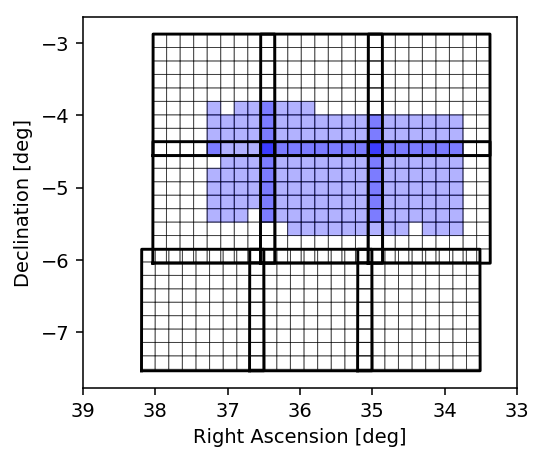

In [7]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
        
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k')
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.5)

for file in coadds:
    patch = file.split('/')[6].split('.')[0]
    p = [int(i) for i in patch.split(',')]
    tract = int(file.split('/')[5])
    
    t = sm.generateTract(tract)
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #ax.fill(ra, dec, c = 'r', alpha=0.3, linewidth=0.5)


for file in forced:
    patch = file.split('/')[6]
    p = [int(i) for i in patch.split(',')]
    tract = int(file.split('/')[5])
    
    t = sm.generateTract(int(tract))
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    ax.fill(ra, dec, c = 'b', alpha=.3, linewidth=0.5)
        

    
ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]')
fig.savefig('./figs/sxds_failed_patches.pdf', overwrite=True)
fig.savefig('./figs/sxds_failed_patches.png', overwrite=True)

In [8]:
patches_in_video = json.loads(open('patches_in_video.json', 'r').read())

In [9]:
patches_in_video

{'8766': [[4, 0],
  [7, 2],
  [4, 2],
  [8, 2],
  [5, 1],
  [3, 2],
  [3, 3],
  [2, 1],
  [3, 0],
  [1, 1],
  [5, 2],
  [6, 0],
  [6, 2],
  [2, 0],
  [8, 0],
  [8, 1],
  [1, 2],
  [0, 3],
  [1, 0],
  [6, 1],
  [7, 0],
  [0, 1],
  [2, 3],
  [3, 1],
  [7, 1],
  [2, 2],
  [0, 0],
  [4, 1],
  [1, 3],
  [5, 0],
  [0, 2]],
 '8524': [[0, 8],
  [4, 3],
  [7, 4],
  [5, 4],
  [8, 8],
  [6, 8],
  [7, 8],
  [5, 6],
  [1, 2],
  [0, 3],
  [8, 4],
  [4, 8],
  [5, 3],
  [2, 3],
  [2, 2],
  [6, 3],
  [3, 5],
  [7, 7],
  [4, 2],
  [0, 5],
  [3, 2],
  [1, 7],
  [5, 2],
  [6, 6],
  [1, 8],
  [8, 3],
  [0, 6],
  [7, 3],
  [8, 5],
  [3, 6],
  [0, 2],
  [4, 5],
  [6, 5],
  [4, 6],
  [1, 4],
  [4, 4],
  [6, 7],
  [6, 4],
  [5, 8],
  [1, 6],
  [3, 7],
  [3, 8],
  [1, 3],
  [2, 6],
  [7, 2],
  [2, 5],
  [7, 5],
  [8, 2],
  [2, 4],
  [7, 6],
  [5, 5],
  [4, 7],
  [3, 3],
  [0, 4],
  [8, 7],
  [0, 7],
  [6, 2],
  [5, 7],
  [2, 7],
  [8, 6],
  [2, 8],
  [3, 4],
  [1, 5]],
 '8765': [[4, 0],
  [5, 1],
  [2, 1],
  [1

In [10]:
str([1,2])

'[1, 2]'

In [11]:
passed_coadds = {}

for file in forced:
    patch = file.split('/')[6].split('.')[0]
    p = [int(i) for i in patch.split(',')]
    #print(str(p))
    tract = int(file.split('/')[5])
    try:
        passed_coadds[tract] = passed_coadds[tract].union(set([str(p)]))
    except KeyError:
        passed_coadds[tract] = set([str(p)])

In [12]:
passed_coadds

{8523: {'[0, 3]',
  '[0, 4]',
  '[0, 5]',
  '[0, 6]',
  '[0, 7]',
  '[0, 8]',
  '[1, 2]',
  '[1, 3]',
  '[1, 4]',
  '[1, 5]',
  '[1, 6]',
  '[1, 7]',
  '[1, 8]',
  '[2, 2]',
  '[2, 3]',
  '[2, 4]',
  '[2, 5]',
  '[2, 6]',
  '[2, 7]',
  '[2, 8]',
  '[3, 3]',
  '[3, 4]',
  '[3, 5]',
  '[3, 6]',
  '[3, 7]',
  '[3, 8]',
  '[4, 2]',
  '[4, 3]',
  '[4, 4]',
  '[4, 5]',
  '[4, 6]',
  '[4, 7]',
  '[4, 8]',
  '[5, 2]',
  '[5, 3]',
  '[5, 4]',
  '[5, 5]',
  '[5, 6]',
  '[5, 7]',
  '[5, 8]',
  '[6, 2]',
  '[6, 3]',
  '[6, 4]',
  '[6, 5]',
  '[6, 6]',
  '[6, 7]',
  '[6, 8]'},
 8524: {'[0, 3]',
  '[0, 4]',
  '[0, 5]',
  '[0, 6]',
  '[0, 7]',
  '[0, 8]',
  '[1, 3]',
  '[1, 4]',
  '[1, 5]',
  '[1, 6]',
  '[1, 7]',
  '[1, 8]',
  '[2, 2]',
  '[2, 3]',
  '[2, 4]',
  '[2, 5]',
  '[2, 6]',
  '[2, 7]',
  '[2, 8]',
  '[3, 2]',
  '[3, 3]',
  '[3, 4]',
  '[3, 5]',
  '[3, 6]',
  '[3, 7]',
  '[3, 8]',
  '[4, 2]',
  '[4, 3]',
  '[4, 4]',
  '[4, 5]',
  '[4, 6]',
  '[4, 7]',
  '[4, 8]',
  '[5, 2]',
  '[5, 3]',
  '

In [13]:
failed_tiles = {}
for tract in patches_in_video:
    failed_tiles[tract] = set([str(p) for p in patches_in_video[tract]]).difference(passed_coadds[int(tract)])
  

In [14]:
failed_tiles

{'8766': set(),
 '8524': {'[0, 2]', '[1, 2]'},
 '8765': set(),
 '8523': {'[0, 2]', '[3, 2]'},
 '8767': {'[5, 3]', '[7, 0]'},
 '8525': {'[4, 2]',
  '[4, 7]',
  '[5, 2]',
  '[5, 8]',
  '[6, 2]',
  '[6, 8]',
  '[7, 2]',
  '[7, 3]',
  '[8, 2]'}}

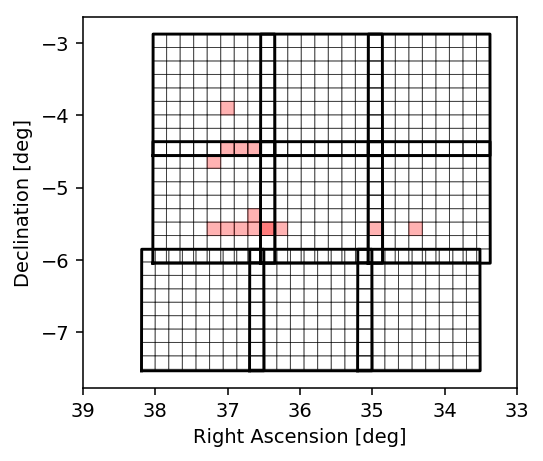

In [15]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
        
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k')
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.5)

for tract in failed_tiles:
    for patch in failed_tiles[tract]:
        
        p = [int(patch[1]), int(patch[4])]
        tract = int(tract)
    
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.fill(ra, dec, c = 'r', alpha=0.3, linewidth=0.5)



        

    
ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]')
fig.savefig('./figs/sxds_patches_to_rerun_{}.pdf'.format(SUFFIX), overwrite=True)
fig.savefig('./figs/sxds_patches_to_rerun_{}.png'.format(SUFFIX), overwrite=True)

The row at the bottom right have very little of the VISTA tile overlapping so lets remove them manually

In [16]:
#patches on row 2 in tracts 8524 and 8525 are barely covered
after_manual_removals = {
 '8766': {'[2, 2]'},
 '8524': {
 #'[0, 2]', 
 #'[1, 2]', 
 '[2, 4]'},
 '8765': set(),
 '8523': {'[2, 8]', '[3, 3]'},
 '8767': {'[6, 1]'},
 '8525': {
  #'[4, 2]',
  #'[5, 2]',
  #'[6, 2]',
  '[6, 8]',
  #'[7, 2]',
  #'[8, 2]',
  '[8, 6]'}
}
manual_removals = {
     #'8766': {'[2, 2]'},
     '8524': {
     '[0, 2]', 
     '[1, 2]' ,
     #'[2, 4]'},
     #'8765': set(),
     #'8523': {'[2, 8]', '[3, 3]'},
     #'8767': {'[6, 1]'},
     },
     '8525': {
     #'[8, 1]',
     '[4, 2]',
     '[5, 2]',
     '[6, 2]',
     #'[6, 8]',
     '[7, 2]',
     '[8, 2]',
     #'[8, 6]'}
    }
}
#failed_tiles = after_manual_removals

In [17]:

for t in manual_removals:
    failed_tiles[t] = set(failed_tiles[t]) - set(manual_removals[t])
failed_tiles

{'8766': set(),
 '8524': set(),
 '8765': set(),
 '8523': {'[0, 2]', '[3, 2]'},
 '8767': {'[5, 3]', '[7, 0]'},
 '8525': {'[4, 7]', '[5, 8]', '[6, 8]', '[7, 3]'}}

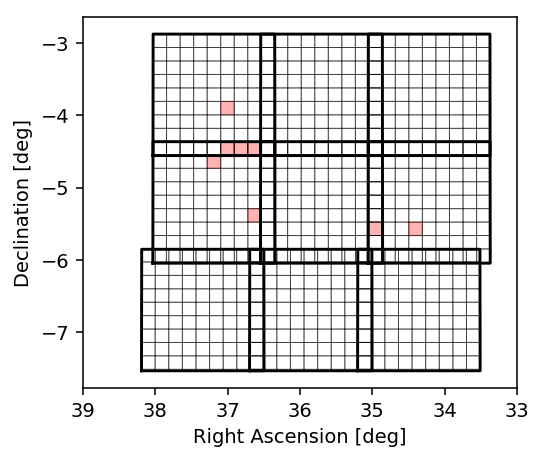

In [18]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
        
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k')
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.5)

for tract in failed_tiles:
    for patch in failed_tiles[tract]:
        
        p = [int(patch[1]), int(patch[4])]
        tract = int(tract)
    
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.fill(ra, dec, c = 'r', alpha=0.3, linewidth=0.5)



        

    
ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]')
fig.savefig('./figs/sxds_patches_to_rerun_{}.pdf'.format(SUFFIX), overwrite=True)
fig.savefig('./figs/sxds_patches_to_rerun_{}.png'.format(SUFFIX), overwrite=True)

## 2 Make job dictionary

Presently we just make a single lists of failures to have both coadd and photopipe rerun. We also need to the total number to feed into the job array scripts

In [19]:
n=0
patch_job_dict = {}
for t in failed_tiles:
    for p in failed_tiles[t]:
        patch_job_dict[str(n)]=[t, "{},{}".format(p[1],p[4]), ]
        n+=1
n

8

In [20]:
patch_job_dict

{'0': ['8523', '0,2'],
 '1': ['8523', '3,2'],
 '2': ['8767', '5,3'],
 '3': ['8767', '7,0'],
 '4': ['8525', '4,7'],
 '5': ['8525', '7,3'],
 '6': ['8525', '5,8'],
 '7': ['8525', '6,8']}

In [21]:

with open('./slurm/failed_patch_job_dict_{}_{}.json'.format(SUFFIX,n), 'w') as outfile:
    json.dump(patch_job_dict, outfile, separators=(',', ':'))

In [22]:
'./slurm/failed_patch_job_dict_{}_{}.json'.format(SUFFIX,n)

'./slurm/failed_patch_job_dict_20210209_8.json'